In [19]:
import pandas as pd 
import numpy as np 
import torch
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt 
import seaborn as sns 


In [7]:
# build a sample data frame 
n_samples = 1000
filenames = ['img_'+str(i) for i in range(n_samples)]
targets = np.random.randint(2, size=n_samples)
tags = ['coco', 'ffhq', 'stylenet2', 'stylenet3', 'imgpaint']
img_tags = np.random.choice(tags, n_samples, replace=True)
# assuming there are 3 different models 
model1_preds = np.random.randint(2, size=n_samples)
model2_preds = np.random.randint(2, size=n_samples)
model3_preds = np.random.randint(2, size=n_samples)

df = pd.DataFrame({'filename': filenames, 'target': targets, 'tag': img_tags, 'm1': model1_preds, 'm2': model2_preds, 'm3': model3_preds})
df.head()

,filename,target,tag,m1,m2,m3
0,img_0,1,imgpaint,0,1,1
1,img_1,1,ffhq,1,1,0
2,img_2,1,imgpaint,1,0,0
3,img_3,1,coco,0,0,1
4,img_4,1,stylenet3,0,0,0


In [10]:
print(classification_report(y_true=df['target'], y_pred=df['m1']))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       496
           1       0.51      0.49      0.50       504

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



In [12]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('label')
    axes.set_xlabel('pred')
    axes.set_title(class_label)

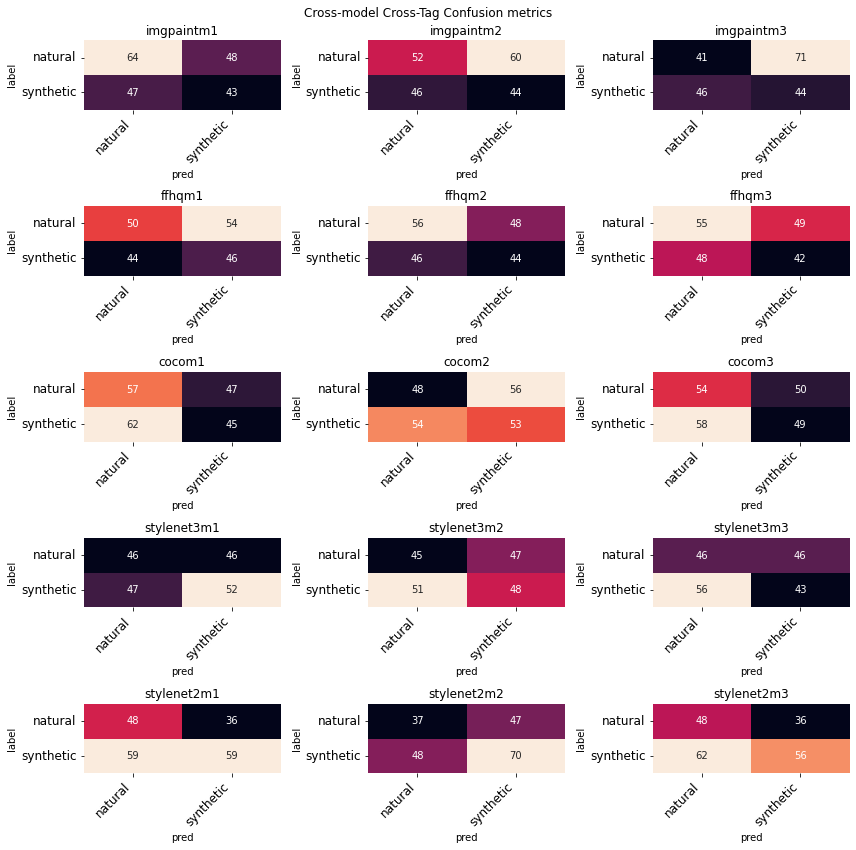

In [21]:

# tags 
target_tags = list(df['tag'].unique())
# models 
model_names = ['m1', 'm2', 'm3']
# plot confusion metrics
fig, ax = plt.subplots(len(target_tags), len(model_names), figsize=(12, 12))

plt.suptitle("Cross-model Cross-Tag Confusion metrics")
for i, tag in enumerate(target_tags):
    t_taget = df.loc[df['tag']==tag, 'target'].values
    for j, m in enumerate(model_names):
        model_pred = df.loc[df['tag']==tag, m].values 
        conf_m = confusion_matrix(t_taget, model_pred, labels=[0, 1])
        print_confusion_matrix(conf_m, ax[i][j], tag+m, ['natural', 'synthetic'])

fig.tight_layout()
plt.show()

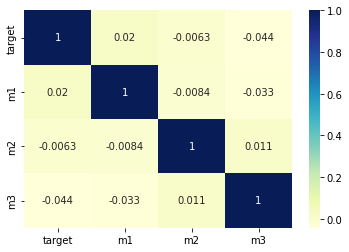

In [22]:
# model cross-correlation heatmap
label_df = df.loc[:, ['target', 'm1', 'm2', 'm3']]
dataplot = sns.heatmap(label_df.corr(), cmap='YlGnBu', annot=True)


In [25]:
def corr_wt_target(df, target, columns):
    absCorr = []
    for col in columns:
        absCorr.append(abs(df[target].corr(df[col])))

    ax = sns.lineplot(columns,absCorr)
    ax.set_xticklabels(columns,rotation=45, horizontalalignment='right')
    ax.set_title("Absolute correlation of features with the target")

c:\Users\deela\anaconda3\envs\vip22\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deela\AppData\Local\Temp\ipykernel_28080\125191543.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns,rotation=45, horizontalalignment='right')


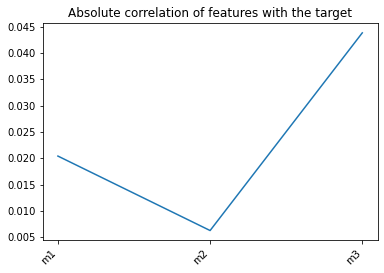

In [26]:
corr_wt_target(df, 'target', ['m1', 'm2', 'm3'])

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cals_VIF(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,1) for i in range(df.shape[1])]
    return vif

In [29]:
cals_VIF(label_df)

,variables,VIF
0,target,1.552764
1,m1,1.552764
2,m2,1.552764
3,m3,1.552764


In [30]:
def pair_wise_scatter_plot(df, columns):
    pp = sns.pairplot(df[columns], size=1.8, aspect=1.8,
        plot_kws=dict(edgecolor='k', linewidth=0.5),
        diag_kind='kde', diag_kws=dict(shade=True))
    fig = pp.fig
    fig.subplots_adjust(top=0.93, wspace=0.3)
    t = fig.suptitle('pair-wise correlation scatter plot', fontsize=14)

c:\Users\deela\anaconda3\envs\vip22\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


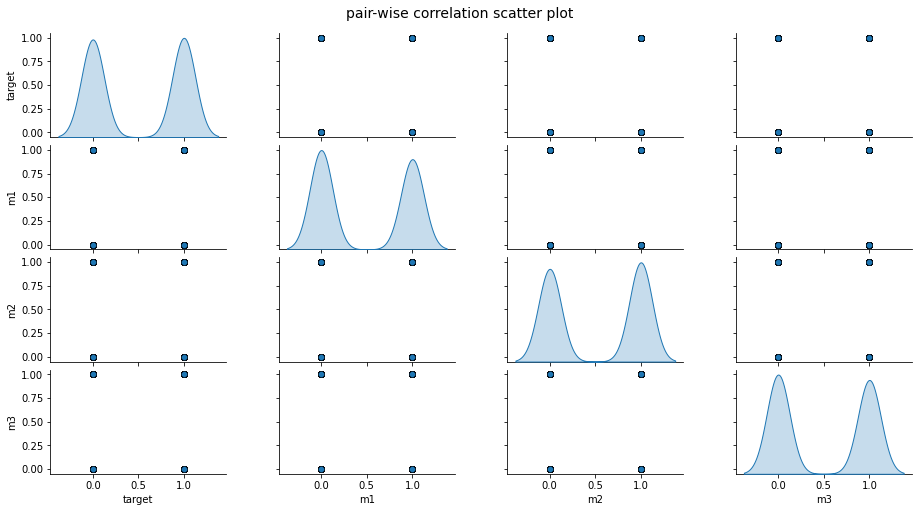

In [31]:
pair_wise_scatter_plot(df, ['target', 'm1', 'm2', 'm3'])